In [25]:
! pip install -q 'gwosc==0.5.4'
! pip install pycbc
! pip install -q 'gwpy==3.0.8'


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Part 1.

In [24]:
#Loading the data as a time series.

import gwosc
import warnings
from gwpy.timeseries import TimeSeries

warnings.filterwarnings('ignore')

data = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

In [26]:
#Testing the sampling rate and duration of the data.

print("Sample rate: " + str(data.sample_rate))
print("Duration: " + str(data.duration))

Sample rate: 4096.0 Hz
Duration: 128.0 s


Part 2.

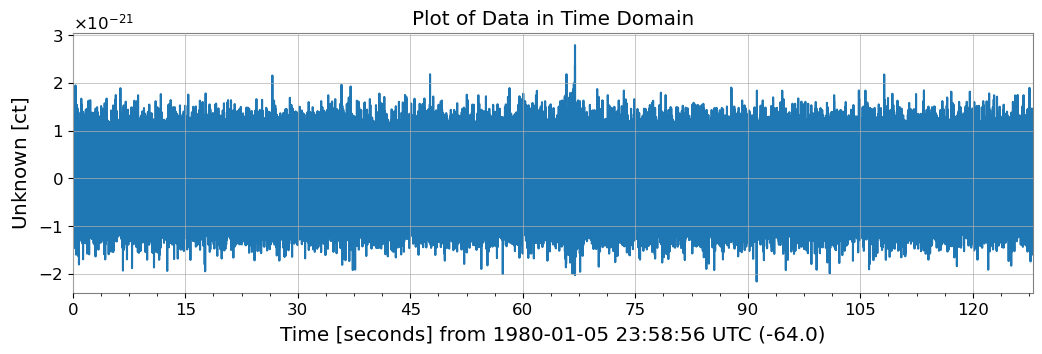

In [27]:
#Plotting the data in the time domain. 

import matplotlib.pyplot as plt

plot = data.plot();
plt.title("Plot of Data in Time Domain")
plt.show()

Part 3.

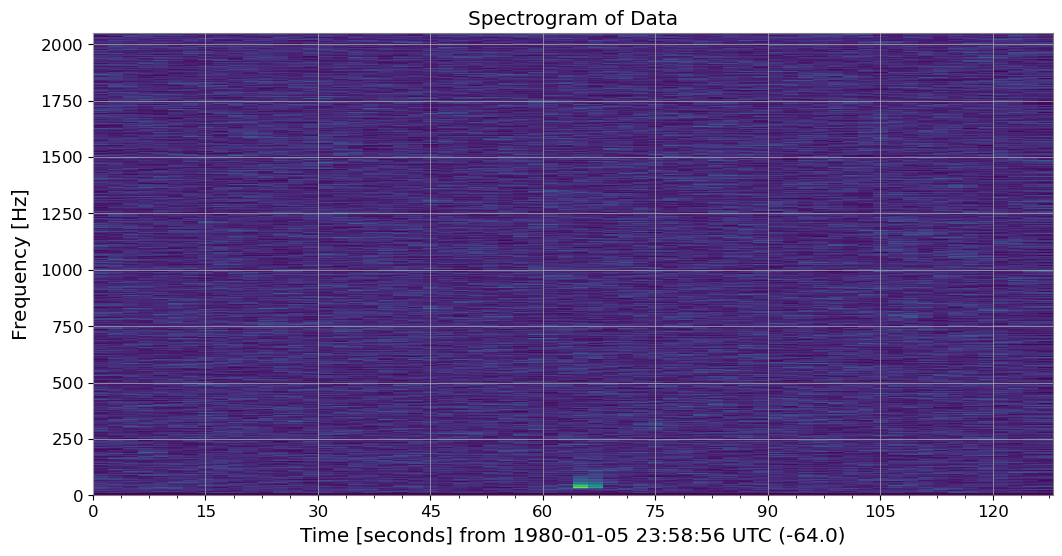

In [28]:
#Spectrogram of the data.

specgram = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()
plt.title("Spectrogram of Data")
plt.show()

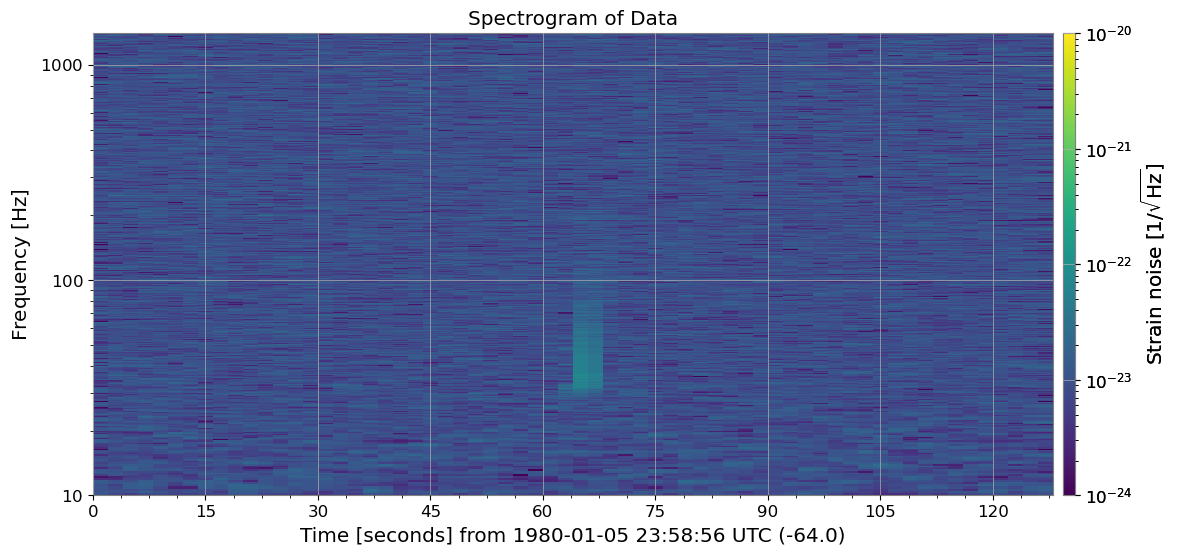

In [30]:
#Improval upon original spectrogram plot 

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)    #setting y range about presumed signal (green mark on above spectrogram)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refreshes the data

The above spectrogram indicates the signal (the greenish section). Thus, we have successfully identified the signal. We will now produce a Q-Plot of the data in an attempt to better visualise the signal and find the time of the merger. 

Part 4.

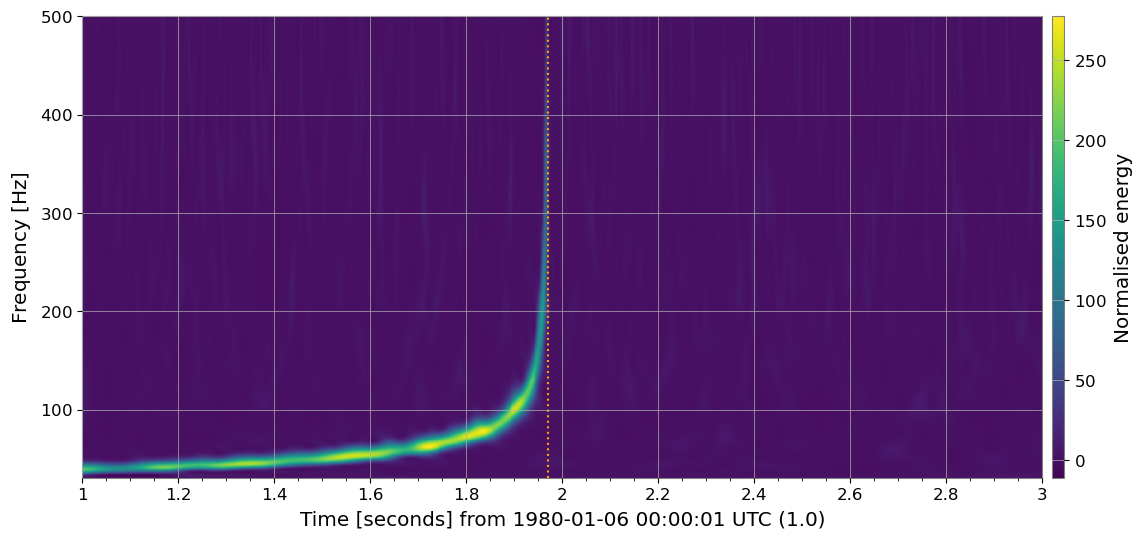

Time of merger: 1980-01-06 00:02:98 (UTC)


In [31]:
#Plots a q plot of the data. This was done because it was challenging to get a good representation of the signal from the spectrogram. 
#This section of code also identifies time of the merger.

import numpy

q = data.q_transform(frange=(30,500), qrange=(10,15), outseg=(2,4))
qplot = q.plot()
ax = qplot.gca()
ax.colorbar(label="Normalised energy")
plt.axvline(x=2.97, color='orange', linestyle=':')   # Draws a vertical line at the time of the signal.
plt.show()
print("Time of merger: 1980-01-06 00:02:98 (UTC)")


All calculation and coding techniques were adapted from the GW_BigData_tutorial-2 found in the module section of the PRA3024 Canvas page.

This tutorial can be found at: https://canvas.maastrichtuniversity.nl/courses/17323/files/3534550/download?download_frd=1

